# **Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive') 
%cd /content/gdrive/'MyDrive/ML/Projects/Music Genre/'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML/Projects/Music Genre


# **Extracting File**

In [2]:
!ls

data  MusicGenre.ipynb


In [3]:
#!unzip data/train.csv.zip

In [4]:
!ls

data  MusicGenre.ipynb


# **Libraries**

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

import warnings 
warnings.filterwarnings('ignore')

# EDA

#### Read data

In [6]:
df = pd.read_csv("data/train.csv")
print('Data size : ', len(df))
df.head(3)

Data size :  17996


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.0171,NaN,0.0849,0.899,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.0011,0.004010,0.1010,0.569,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.4860,0.000196,0.3940,0.787,147.681,109667.0,4,6


#### Basic info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [8]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


#### Number of classes in Target variable

In [9]:
df.Class.unique()

array([ 5, 10,  6,  2,  4,  8,  9,  3,  7,  1,  0])



1. **Artist Name : Singer Name**
2. **Track Name  : Song Name**
3. **Popularity  : How Popular a song is**
4. **danceability: Can we dance on a songs** 
5. **energy      : Do we feel energised listening songs**
6. **key         : key**
7.**loudness    : How loud a music is**
8. **mode        : mode**
9. **speechiness : Detect the spoken words in a track**
10. **acousticness : A confidence measure for acoustic level of track**
11.**instrumentalness : instrumentalness**
12. **liveness  :liveness**
13. **valence   : How You feel when listen to a song like happy, sad etc**
14. **tempo     : The speed at which a piece of music should be played**
15.**duration_in min/ms :The length of time each note is played for**
16. **time_signature  :how many counts are in each measure and which type of note  will receive one count**
17. **Class           : Represent 9 catogary**





1. coustic/Folk_0 : Acoustic Folk Genre

2. Alt_Music_1:Alt Music Genre

3. Blues_2: Blues Genre

4. Bollywood_3: Bollywood Music Genre

5. Country_4: Country Music Genr

6. HipHop_5:HipHop Music Genre

7. Indie Alt_6: Indie Music Genre

8. Instrumental_7: Instrumental Music Genre

9. Metal_8: Metal Music Genre

10. Pop_9: Pop Music Genre


#### **Split data into train and validation with ratio 80:20**

In [10]:
x_train, x_val = train_test_split(df, test_size=.20, random_state=0)
print(x_train.shape, x_val.shape)
x_train.head(2)

(14396, 17) (3600, 17)


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
4435,Nathan Day,She Came Down From The Stars,48.0,0.487,0.766,5.0,-7.596,1,0.0377,0.0027,NaN,0.219,0.574,155.081,216774.0,4,10
17047,◊ô◊ï◊¶◊®◊ï◊™ ◊ê◊™ ◊î◊ë◊ï◊ù,◊ë◊ï◊ù,46.0,0.662,0.493,4.0,-7.828,0,0.0879,0.6480,0.000006,0.414,0.352,92.931,203310.0,4,9


####**Target Distribution In Training And Validation**

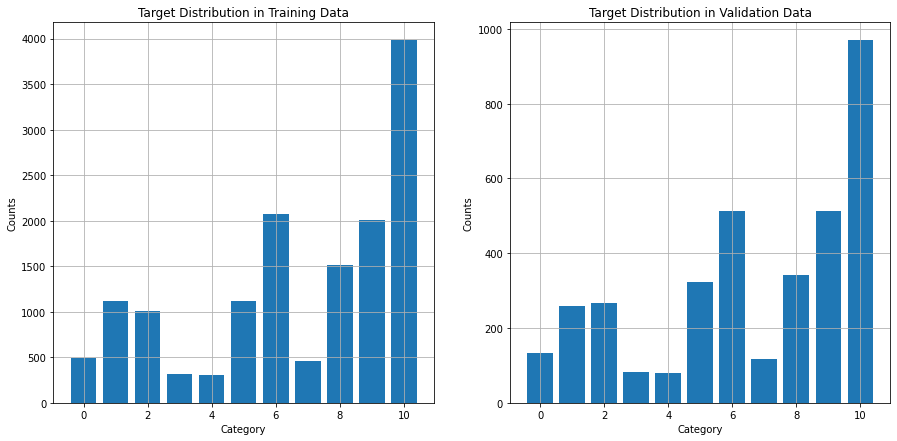

In [11]:
fig, axs = plt.subplots(1,2,figsize=(15,7))

plot_1, plot_2 = axs[0], axs[1]
class_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

plot_1.bar(class_list,x_train.Class.value_counts().sort_index() )
plot_1.set_xlabel("Category")
plot_1.set_ylabel("Counts")
plot_1.set_title('Target Distribution in Training Data')
plot_1.grid(True)

plot_2.bar(class_list,x_val.Class.value_counts().sort_index() )
plot_2.set_xlabel("Category")
plot_2.set_ylabel("Counts")
plot_2.set_title('Target Distribution in Validation Data')
plot_2.grid(True)



1.Distribution of Categories of Target in Training and Validation are similar

2.No Of Features: 16**

3.No of Numeric Features: 13

4.No of Categorical Features :3 [key,mode,time_signature]






1.**No Of Rows or Data Points in Training Set**




In [12]:
print('Total number of rows in Training data : ', len(x_train))
a=x_train.Class.value_counts().sort_index()
a.iloc[:,].sum()
print("Percentage of Each Category In Class Feature For Training'\n")
for i in [0,1, 2,3,4,5,6, 7,8,9,10]:
 b=a.loc[i]/a.iloc[:,].sum()
 print("Category {} : {} % '\n".format(i,100*b))

Total number of rows in Training data :  14396
Percentage of Each Category In Class Feature For Training'

Category 0 : 3.424562378438455 % '

Category 1 : 7.745207001944984 % '

Category 2 : 6.988052236732425 % '

Category 3 : 2.215893303695471 % '

Category 4 : 2.1394831897749373 % '

Category 5 : 7.800777993887191 % '

Category 6 : 14.399833287024174 % '

Category 7 : 3.1814392886913034 % '

Category 8 : 10.49597110308419 % '

Category 9 : 13.962211725479301 % '

Category 10 : 27.64656849124757 % '



In [13]:
a=x_val.Class.value_counts().sort_index()
a.iloc[:,].sum()
print("Percentage of Each Category In Class Feature For Valdition'\n")
for i in [0,2,3,4,5,7,8,9,10]:
 b=a.loc[i]/a.iloc[:,].sum()
 print("Category {} : {} % '\n".format(i,100*b))

Percentage of Each Category In Class Feature For Valdition'

Category 0 : 3.6666666666666665 % '

Category 2 : 7.388888888888889 % '

Category 3 : 2.3055555555555554 % '

Category 4 : 2.194444444444444 % '

Category 5 : 9.0 % '

Category 7 : 3.277777777777778 % '

Category 8 : 9.527777777777779 % '

Category 9 : 14.277777777777779 % '

Category 10 : 26.916666666666668 % '



In [14]:
x_train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
4435,Nathan Day,She Came Down From The Stars,48.0,0.487,0.766,5.0,-7.596,1,0.0377,0.002700,NaN,0.219,0.574,155.081,216774.0,4,10
17047,◊ô◊ï◊¶◊®◊ï◊™ ◊ê◊™ ◊î◊ë◊ï◊ù,◊ë◊ï◊ù,46.0,0.662,0.493,4.0,-7.828,0,0.0879,0.648000,0.000006,0.414,0.352,92.931,203310.0,4,9
2004,AC/DC,Safe in New York City,50.0,0.494,0.881,9.0,-4.773,1,0.0370,0.011100,0.009530,0.104,0.623,160.942,239467.0,4,8
9508,Mike Crigs,Moving Fast (feat. Jared Anthony),40.0,0.639,0.641,8.0,-6.187,1,0.0370,0.227000,NaN,0.104,0.665,124.953,144000.0,4,5
17277,Godsmack,Awake,66.0,0.395,0.756,7.0,-4.120,1,0.0544,0.000017,0.006650,0.319,0.475,112.092,304373.0,4,8


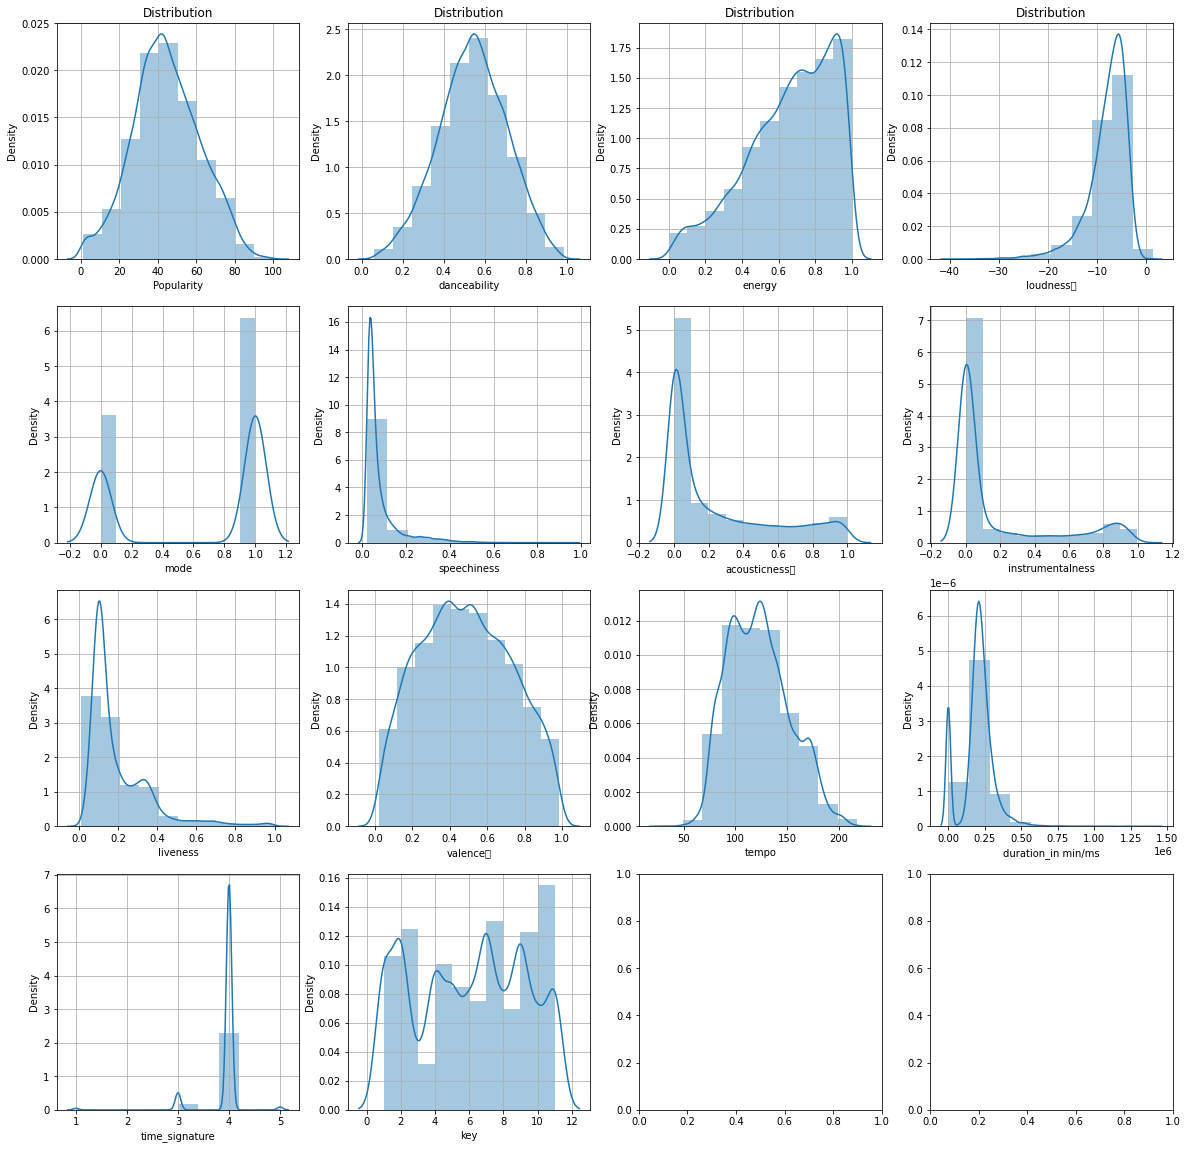

In [15]:
fig,axs=plt.subplots(4,4, figsize=(20,20))
sns.distplot(x_train.Popularity,bins=10,axlabel='Popularity',ax=axs[0,0],label=axs[0,0].set_title('Distribution'))
axs[0,0].grid(True)
sns.distplot(x_train.danceability,bins=10,axlabel='danceability',ax=axs[0,1],label=axs[0,1].set_title('Distribution'))
axs[0,1].grid(True)
sns.distplot(x_train.energy,bins=10,axlabel='energy',ax=axs[0,2],label=axs[0,2].set_title('Distribution'))
axs[0,2].grid(True)
sns.distplot(x_train.loudness	,bins=10,axlabel='loudness	',ax=axs[0,3],label=axs[0,3].set_title('Distribution'))
axs[0,3].grid()
sns.distplot(x_train['mode']	,bins=10,axlabel='mode',ax=axs[1,0])
axs[1,0].grid()
sns.distplot(x_train.speechiness	,bins=10,axlabel='speechiness',ax=axs[1,1])
axs[1,1].grid()
sns.distplot(x_train.acousticness		,bins=10,axlabel='acousticness	',ax=axs[1,2])
axs[1,2].grid()
sns.distplot(x_train.instrumentalness		,bins=10,axlabel='instrumentalness',ax=axs[1,3])
axs[1,3].grid()
sns.distplot(x_train.liveness		,bins=10,axlabel='liveness',ax=axs[2,0])
axs[2,0].grid()
sns.distplot(x_train.valence,bins=10,axlabel='valence	',ax=axs[2,1])
axs[2,1].grid()
sns.distplot(x_train.tempo,bins=10,axlabel='tempo',ax=axs[2,2])
axs[2,2].grid()
sns.distplot(x_train['duration_in min/ms']	,bins=10,axlabel='duration_in min/ms',ax=axs[2,3])
axs[2,3].grid()
sns.distplot(x_train.time_signature	,bins=10,axlabel='time_signature',ax=axs[3,0])
axs[3,0].grid()
sns.distplot(x_train.key,bins=10,axlabel='key',ax=axs[3,1])
axs[3,1].grid()





1.   **Popularity, Dancebility,Tempo and Valence have normal distribution**
2.   **All other features have skewness**



#### **Relationship Of Feature With Target**

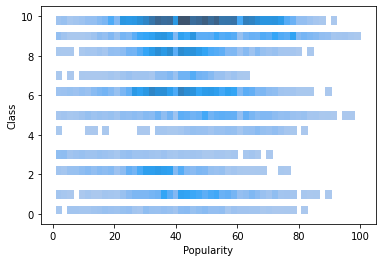

In [16]:
sns.histplot(x='Popularity',y='Class',data=x_train)

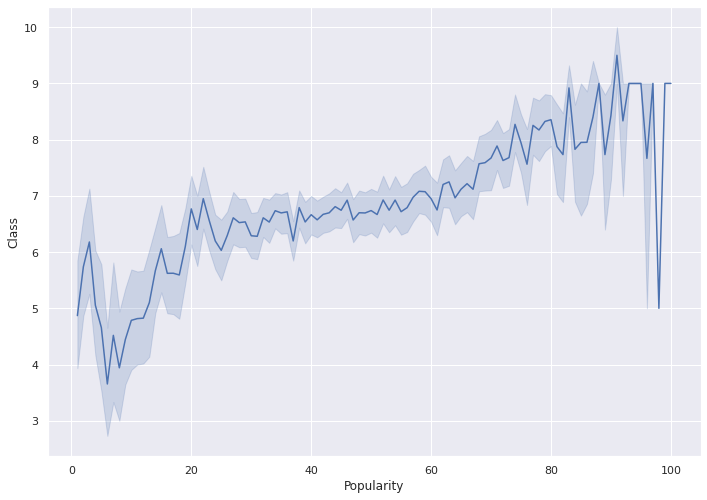

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='Popularity',y='Class',data=x_train)



1. **As we increases Popularity value ,Genre of Music will shift from Bollywood To Pop Music upto a certain value of popularity then it gets reversed**

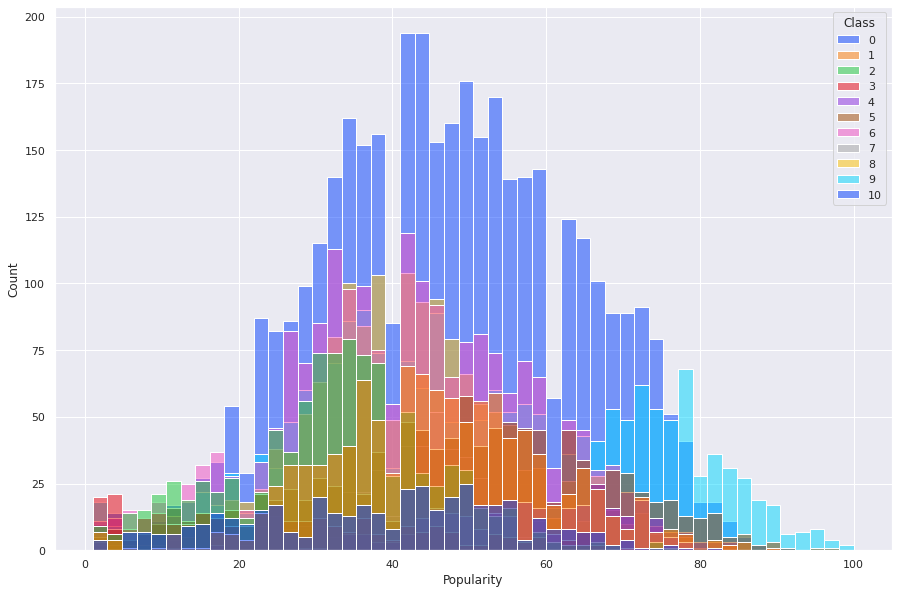

In [18]:


plt.figure(figsize=(15,10))

sns.histplot(x="Popularity",hue="Class",data=x_train, palette="bright")
plt.show()

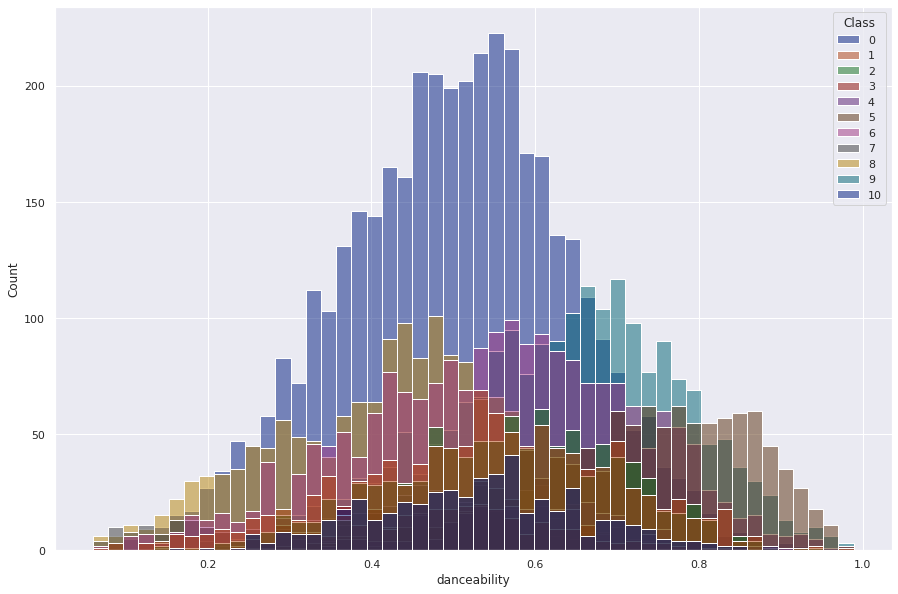

In [19]:
plt.figure(figsize=(15,10))

sns.histplot(x="danceability",hue="Class",data=x_train, palette="dark")
plt.show()

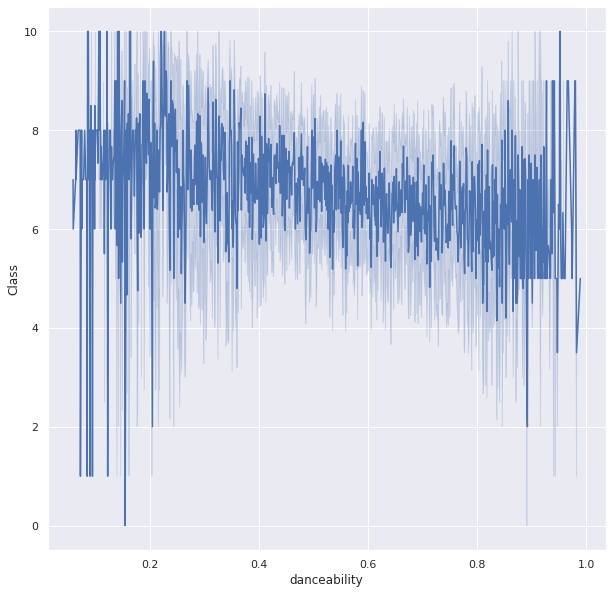

In [20]:
plt.figure(figsize=(10,10))
sns.lineplot(x='danceability',y='Class',data=x_train)



1.   **As dancebility of a track increases, Music Gere will shift from Metal Music genre to Bollywood Genre**
2. **for a given value of dancebility, Track would be in any of class category bcause of music genre class also depends on other feature.But for one particlar class category, probability would be high**



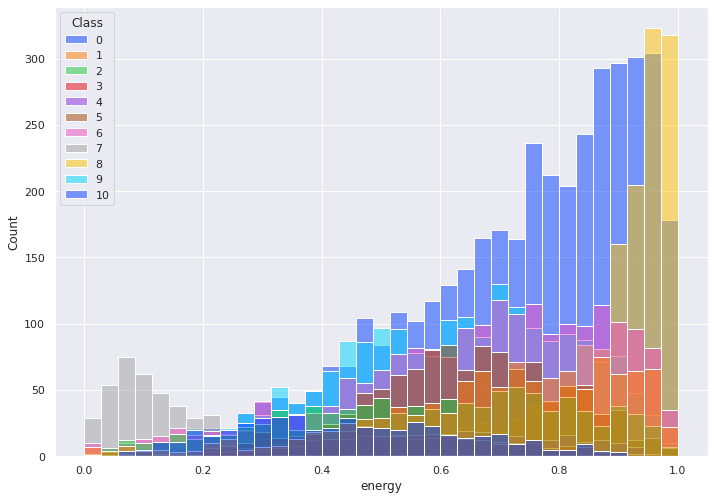

In [21]:
sns.histplot(x='energy',hue='Class',palette="bright",data=x_train)

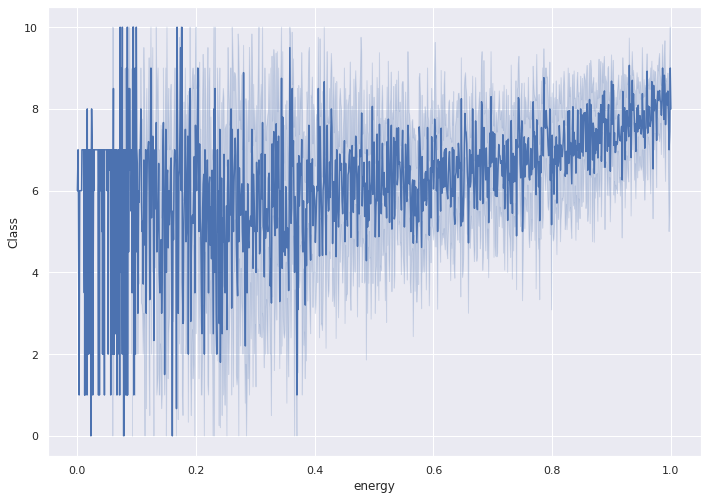

In [22]:
sns.lineplot(x='energy',y='Class',data=x_train)



1. **As we increase energy of a track, music genre will shift from lower class to hiher class**



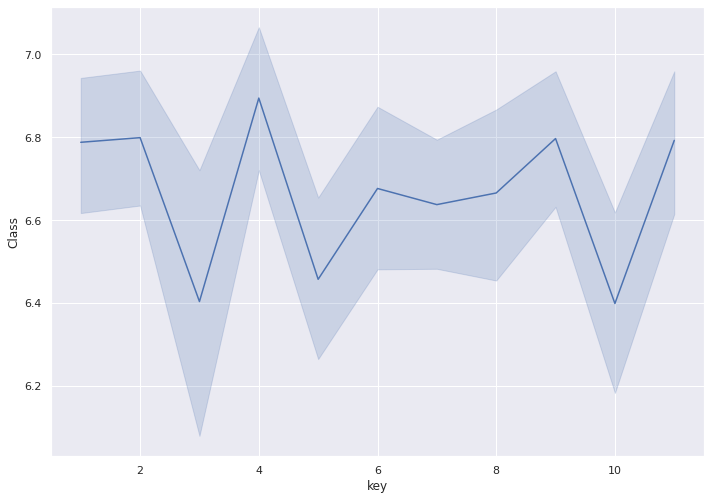

In [23]:
sns.lineplot(x="key",y="Class",data=x_train,palette="bright")

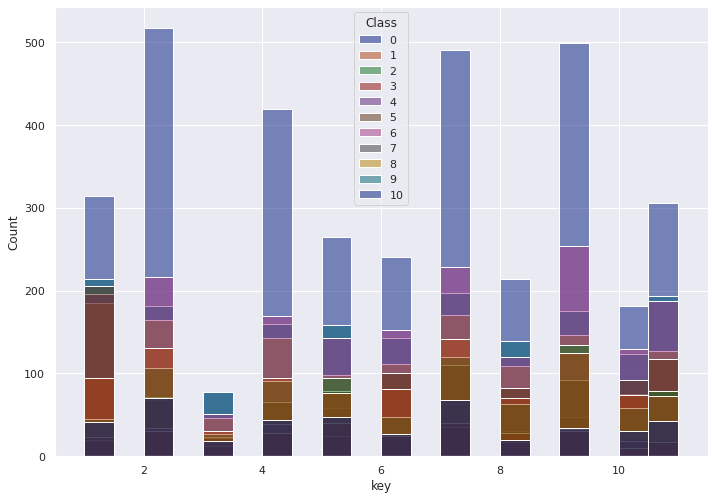

In [24]:
sns.histplot(x="key",hue="Class",data=x_train, palette="dark")



1. **The music genre which have key value (2,4,7,9) have higher chance to be POp music genre**



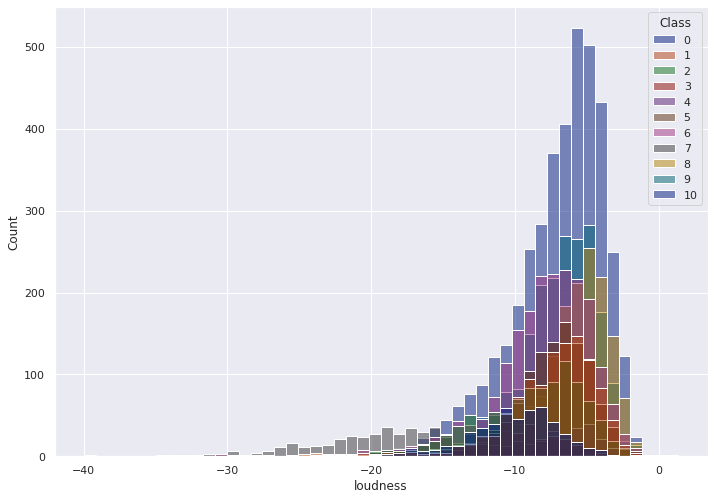

In [25]:
sns.histplot(x="loudness",hue="Class",data=x_train, palette="dark",bins=50)

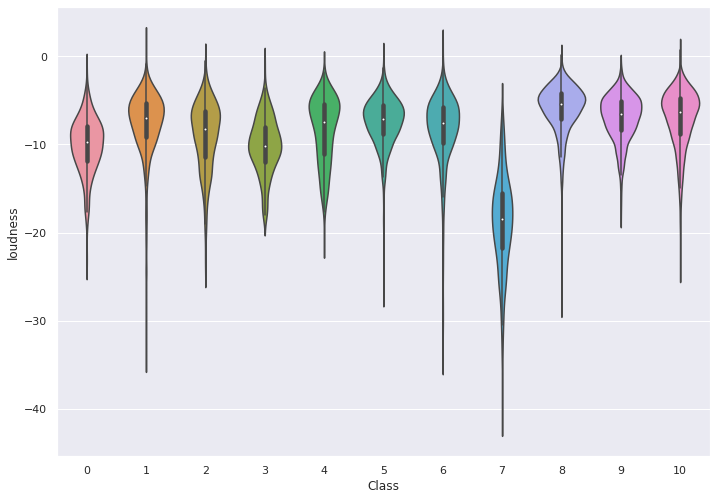

In [26]:
sns.violinplot(x='Class', y='loudness', data=x_train)



1. **If we have loudness value less than -15 , then track from class 7 will have more chance**



<Figure size 1080x1080 with 0 Axes>

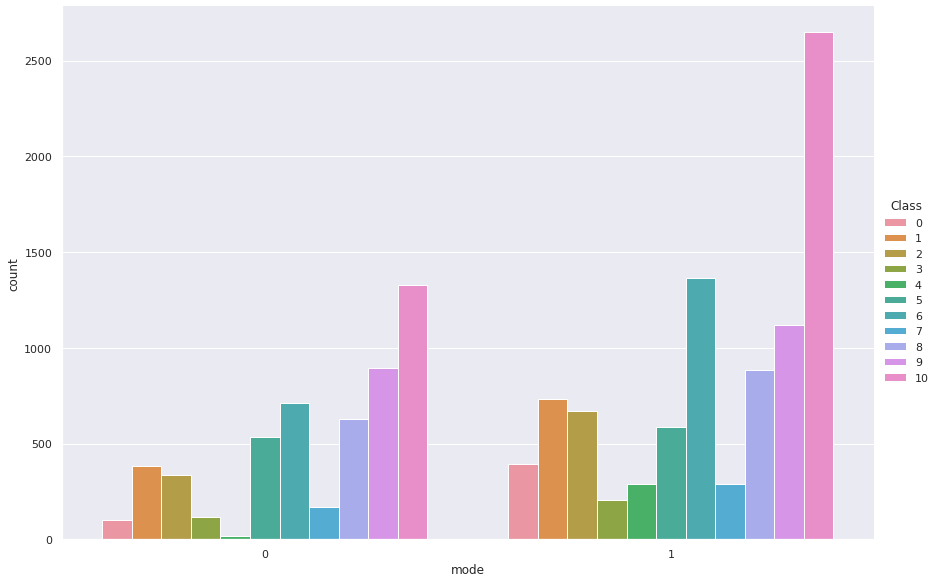

In [27]:

plt.figure(figsize=(15,15))
sns.catplot(x="mode", hue="Class",kind="count",data=x_train,height=8.27, aspect=1.5)
plt.show()



1.**if the music genre have mode value =0 , we can say that we are much more confident that this music genre will not be of  class 4**




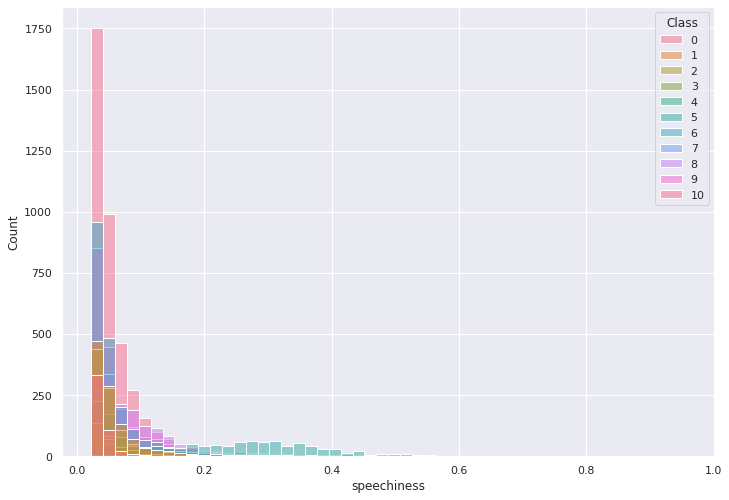

In [28]:
sns.histplot(hue='Class', x="speechiness", data=x_train,bins=50,palette="husl")



1. **the Higher the speechniness, the more chance of class 5 is**



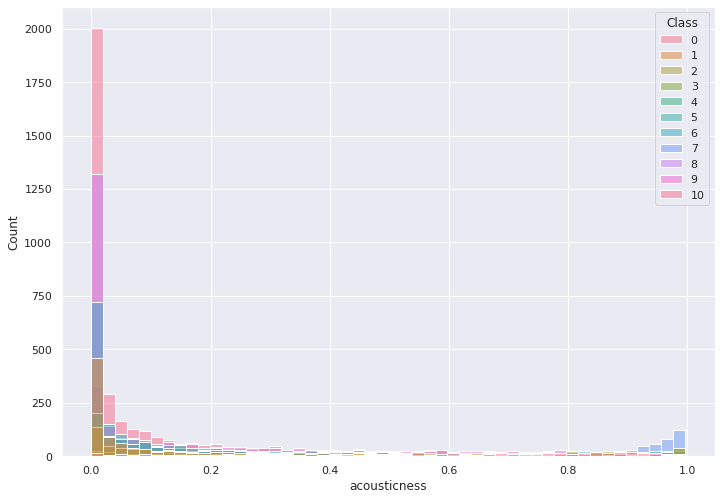

In [29]:
sns.histplot(hue='Class', x="acousticness", data=x_train,bins=50,palette="husl")

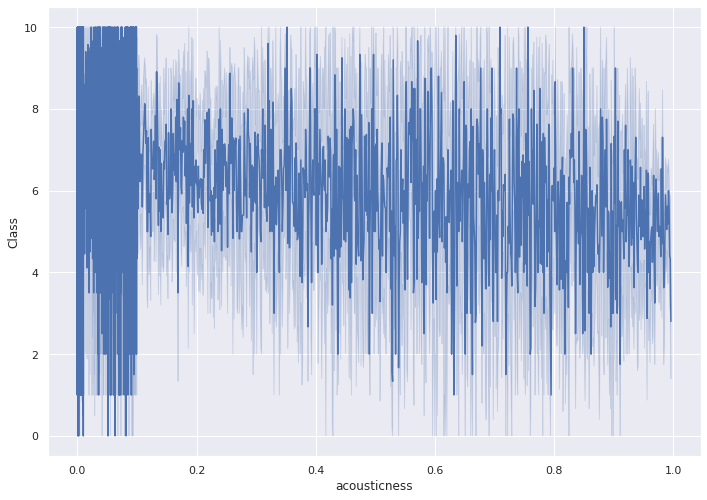

In [30]:
sns.lineplot(y='Class', x="acousticness", data=x_train,palette="husl")

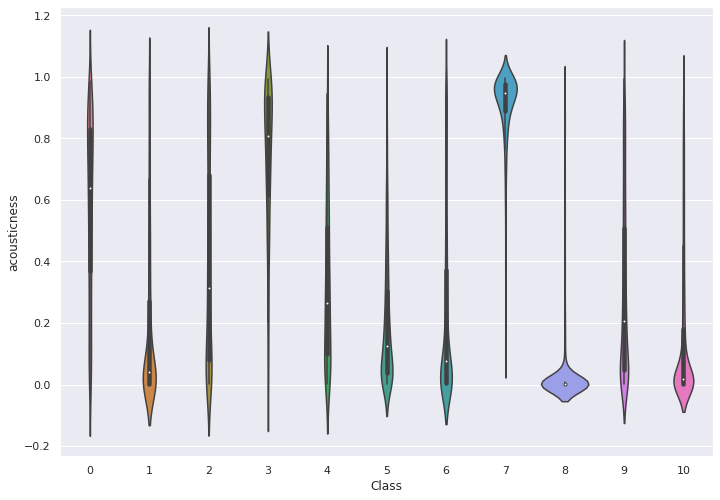

In [31]:
sns.violinplot(x='Class', y="acousticness", data=x_train,palette="husl")

####**Missimng Value Analysis**

In [32]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14396 entries, 4435 to 2732
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  object 
 1   Track Name          14396 non-null  object 
 2   Popularity          14043 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 12806 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    10898 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Cl


1. **Popularity Feature have 2.7% missing values** 
2. **Key feature have 11% missing values**
3.**instrumentalness have 27.02% missing values**
4.**Noticed these values in Training,val,Test**



In [33]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3600 entries, 13892 to 16465
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         3600 non-null   object 
 1   Track Name          3600 non-null   object 
 2   Popularity          3525 non-null   float64
 3   danceability        3600 non-null   float64
 4   energy              3600 non-null   float64
 5   key                 3176 non-null   float64
 6   loudness            3600 non-null   float64
 7   mode                3600 non-null   int64  
 8   speechiness         3600 non-null   float64
 9   acousticness        3600 non-null   float64
 10  instrumentalness    2721 non-null   float64
 11  liveness            3600 non-null   float64
 12  valence             3600 non-null   float64
 13  tempo               3600 non-null   float64
 14  duration_in min/ms  3600 non-null   float64
 15  time_signature      3600 non-null   int64  
 16  C

# Model Training

###**Train-Test Split**

In [34]:
x_train, x_val= train_test_split(df,train_size=0.8,random_state=0)
print(x_train.shape, x_val.shape)
x_train.head(3)

(14396, 17) (3600, 17)


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
4435,Nathan Day,She Came Down From The Stars,48.0,0.487,0.766,5.0,-7.596,1,0.0377,0.0027,NaN,0.219,0.574,155.081,216774.0,4,10
17047,◊ô◊ï◊¶◊®◊ï◊™ ◊ê◊™ ◊î◊ë◊ï◊ù,◊ë◊ï◊ù,46.0,0.662,0.493,4.0,-7.828,0,0.0879,0.6480,0.000006,0.414,0.352,92.931,203310.0,4,9
2004,AC/DC,Safe in New York City,50.0,0.494,0.881,9.0,-4.773,1,0.0370,0.0111,0.009530,0.104,0.623,160.942,239467.0,4,8


###**Data Pipeline**

In [35]:
filling_dict={"Popularity":x_train.Popularity.mean(),"key":x_train.key.median(),"instrumentalness":x_train.instrumentalness.median()}

In [36]:
# filling Popularity with Mean
#filling Key with median
#filling intrumentalness with median

def data_pipline(fill_dict,data,target=None):

  data["Popularity"]=data.Popularity.fillna(fill_dict["Popularity"])
  
  data["key"]=data.key.fillna(fill_dict["key"])
  
  data["instrumentalness"]=data.instrumentalness.fillna(fill_dict["instrumentalness"])
  
  data=data.drop(["Artist Name", "Track Name"],axis=1)
  
  if target:
    y=data[target]
    x=data.drop(target,axis=1)
    return x,y
  return data 

In [37]:
X_train,Y_train = data_pipline(filling_dict,x_train,target="Class")
X_val,Y_val=data_pipline(filling_dict,x_val,"Class")
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)
X_train.head(1)

(14396, 14) (14396,) (3600, 14) (3600,)


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
4435,48.0,0.487,0.766,5.0,-7.596,1,0.0377,0.0027,0.00418,0.219,0.574,155.081,216774.0,4


### **Rough Models**

####**Logistic Regression**

In [38]:
model_log=LogisticRegression(random_state=0)

model_log.fit(X_train,Y_train)

pred_train=model_log.predict(X_train)

pred_val=model_log.predict(X_val)

print("Train classification report")
print(classification_report(Y_train, pred_train))

print("Val classification report")
print(classification_report(Y_val, pred_val))

Train classification report
              precision    recall  f1-score   support

           0       0.24      1.00      0.39       493
           1       0.00      0.00      0.00      1115
           2       0.00      0.00      0.00      1006
           3       0.00      0.00      0.00       319
           4       0.00      0.00      0.00       308
           5       0.00      0.00      0.00      1123
           6       0.00      0.00      0.00      2073
           7       0.00      0.00      0.00       458
           8       0.15      0.01      0.01      1511
           9       0.14      0.05      0.08      2010
          10       0.31      0.90      0.46      3980

    accuracy                           0.29     14396
   macro avg       0.08      0.18      0.09     14396
weighted avg       0.13      0.29      0.15     14396

Val classification report
              precision    recall  f1-score   support

           0       0.25      1.00      0.40       132
           1       0.00 

####**Decision Tree**

In [39]:
model_dt=DecisionTreeClassifier(random_state=0)

model_dt.fit(X_train,Y_train)

pred_train=model_dt.predict(X_train)

pred_val=model_dt.predict(X_val)

print("Train classification report")
print(classification_report(Y_train, pred_train))

print("Val classification report")
print(classification_report(Y_val, pred_val))

Train classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       0.64      1.00      0.78      1115
           2       0.95      1.00      0.97      1006
           3       1.00      1.00      1.00       319
           4       1.00      1.00      1.00       308
           5       0.97      1.00      0.98      1123
           6       0.90      0.82      0.86      2073
           7       1.00      1.00      1.00       458
           8       0.91      1.00      0.95      1511
           9       0.97      0.94      0.95      2010
          10       1.00      0.85      0.92      3980

    accuracy                           0.92     14396
   macro avg       0.94      0.96      0.95     14396
weighted avg       0.94      0.92      0.92     14396

Val classification report
              precision    recall  f1-score   support

           0       0.57      0.56      0.56       132
           1       0.06 

####**Random Forest**

In [40]:
model_rf=RandomForestClassifier(random_state=0)

model_rf.fit(X_train,Y_train)

pred_train=model_rf.predict(X_train)

pred_val=model_rf.predict(X_val)

print("Train classification report")
print(classification_report(Y_train, pred_train))

print("Val classification report")
print(classification_report(Y_val, pred_val))

Train classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       0.78      0.68      0.73      1115
           2       0.97      0.97      0.97      1006
           3       1.00      1.00      1.00       319
           4       1.00      1.00      1.00       308
           5       0.97      0.99      0.98      1123
           6       0.86      0.86      0.86      2073
           7       1.00      1.00      1.00       458
           8       0.96      0.94      0.95      1511
           9       0.95      0.95      0.95      2010
          10       0.90      0.94      0.92      3980

    accuracy                           0.92     14396
   macro avg       0.95      0.94      0.94     14396
weighted avg       0.92      0.92      0.92     14396

Val classification report
              precision    recall  f1-score   support

           0       0.68      0.83      0.74       132
           1       0.06 

#### **Note:** Random Forest is doing better than other models. Let's do rest experiments with Random Forest.

### **Experiment 1: Remove samples of the class doing very bad in performance.**

#### Drop samples of the class doing bad.

In [41]:
x_train_drop_samples = x_train.drop(x_train.loc[(x_train.Class == 1) | (x_train.Class == 6)].index, axis=0)
x_val_drop_samples = x_val.drop(x_val.loc[(x_val.Class == 1) | (x_val.Class == 6)].index, axis=0)
print(x_train_drop_samples.shape, x_val_drop_samples.shape)
x_train_drop_samples.head(2)

(11208, 17) (2828, 17)


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
4435,Nathan Day,She Came Down From The Stars,48.0,0.487,0.766,5.0,-7.596,1,0.0377,0.0027,0.004180,0.219,0.574,155.081,216774.0,4,10
17047,◊ô◊ï◊¶◊®◊ï◊™ ◊ê◊™ ◊î◊ë◊ï◊ù,◊ë◊ï◊ù,46.0,0.662,0.493,4.0,-7.828,0,0.0879,0.6480,0.000006,0.414,0.352,92.931,203310.0,4,9


#### Data Preprocessing

In [42]:
X_train,Y_train = data_pipline(filling_dict,x_train_drop_samples,target="Class")
X_val,Y_val=data_pipline(filling_dict,x_val_drop_samples,"Class")
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)
X_train.head(1)

(11208, 14) (11208,) (2828, 14) (2828,)


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
4435,48.0,0.487,0.766,5.0,-7.596,1,0.0377,0.0027,0.00418,0.219,0.574,155.081,216774.0,4


####**Random Forest**

In [43]:
model_rf=RandomForestClassifier(random_state=0)

model_rf.fit(X_train,Y_train)

pred_train=model_rf.predict(X_train)

pred_val=model_rf.predict(X_val)

print("Train classification report")
print(classification_report(Y_train, pred_train))

print("Val classification report")
print(classification_report(Y_val, pred_val))

Train classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           2       0.98      0.97      0.97      1006
           3       1.00      1.00      1.00       319
           4       1.00      1.00      1.00       308
           5       0.98      0.98      0.98      1123
           7       1.00      1.00      1.00       458
           8       0.96      0.94      0.95      1511
           9       0.97      0.96      0.97      2010
          10       0.96      0.97      0.97      3980

    accuracy                           0.97     11208
   macro avg       0.98      0.98      0.98     11208
weighted avg       0.97      0.97      0.97     11208

Val classification report
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       132
           2       0.58      0.36      0.44       266
           3       0.87      0.81      0.84        83
           4       0.71 

####**Random Forest with CV**

In [44]:
x_total_without16=pd.concat([x_train_drop_samples,x_val_drop_samples],axis=0)
x_total_without16_proccesd,y_total_without16_proccesd= data_pipline(filling_dict,x_total_without16,"Class")
model_without16= RandomForestClassifier(random_state=0)
score_withou16= cross_val_score(model_without16,x_total_without16_proccesd,y_total_without16_proccesd,cv=5,scoring="f1_macro")
print(score_withou16.mean())

0.6811785661041341


### **Experiment 2: Oversampling for the class doing very bad in performance.**

In [45]:
def get_num_ratio(df):

  count = df.Class.value_counts()
  ratio = count / len(df)
  return pd.concat([count, ratio], axis=1, keys=['count', 'ratio'])

In [46]:
get_num_ratio(x_train)

,count,ratio
10,3980,0.276466
6,2073,0.143998
9,2010,0.139622
8,1511,0.104960
5,1123,0.078008
1,1115,0.077452
2,1006,0.069881
0,493,0.034246
7,458,0.031814
3,319,0.022159


#### Oversampling of the class doing bad.

In [47]:
df_class_1 = x_train.loc[x_train.Class == 1].sample(frac=0.5)
df_class_6 = x_train.loc[x_train.Class == 6].sample(frac=0.5)

x_train_oversampled = pd.concat([x_train, df_class_1, df_class_6])
x_train_oversampled = x_train_oversampled.sample(frac=1).reset_index(drop=True)
print("Data size : ", len(x_train_oversampled))
x_train_oversampled.head(2)

Data size :  15990


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Shlomo Ydov,◊ô◊û◊ô◊ù ◊ú◊ë◊†◊ô◊ù,38.0,0.522,0.194,2.0,-15.228,1,0.0328,0.7130,0.004180,0.0985,0.187,112.218,242373.0,4,10
1,Iron Maiden,Wasted Years - 1998 Remaster,39.0,0.224,0.956,4.0,-5.520,0,0.1190,0.0598,0.000027,0.1520,0.394,154.166,306160.0,4,8


In [48]:
get_num_ratio(x_train_oversampled)

,count,ratio
10,3980,0.248906
6,3109,0.194434
9,2010,0.125704
1,1673,0.104628
8,1511,0.094497
5,1123,0.070231
2,1006,0.062914
0,493,0.030832
7,458,0.028643
3,319,0.019950


#### Data Preprocessing

In [49]:
X_train,Y_train = data_pipline(filling_dict,x_train_oversampled,target="Class")
X_val,Y_val=data_pipline(filling_dict,x_val,"Class")
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)
X_train.head(1)

(15990, 14) (15990,) (3600, 14) (3600,)


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,38.0,0.522,0.194,2.0,-15.228,1,0.0328,0.713,0.00418,0.0985,0.187,112.218,242373.0,4


####**Random Forest**

In [50]:
model_rf=RandomForestClassifier(random_state=0)

model_rf.fit(X_train,Y_train)

pred_train=model_rf.predict(X_train)

pred_val=model_rf.predict(X_val)

print("Train classification report")
print(classification_report(Y_train, pred_train))

print("Val classification report")
print(classification_report(Y_val, pred_val))

Train classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       0.78      0.82      0.80      1673
           2       0.98      0.97      0.97      1006
           3       1.00      1.00      1.00       319
           4       1.00      1.00      1.00       308
           5       0.98      0.98      0.98      1123
           6       0.88      0.90      0.89      3109
           7       1.00      1.00      1.00       458
           8       0.96      0.94      0.95      1511
           9       0.96      0.94      0.95      2010
          10       0.93      0.91      0.92      3980

    accuracy                           0.92     15990
   macro avg       0.95      0.95      0.95     15990
weighted avg       0.92      0.92      0.92     15990

Val classification report
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       132
           1       0.06 

###**Experiment 3 : Oversampling of overall data for week Classes**

In [51]:
df_class_1_overall = df.loc[df.Class == 1].sample(frac=0.5)
df_class_6_overall = df.loc[df.Class == 6].sample(frac=0.5)

df_oversampled = pd.concat([df, df_class_1_overall, df_class_6_overall])
df_oversampled = df_oversampled.sample(frac=1).reset_index(drop=True)
print("Data size : ", len(df_oversampled))
df_oversampled.shape

Data size :  19976


(19976, 17)

In [52]:
get_num_ratio(df)

,count,ratio
10,4949,0.275006
6,2587,0.143754
9,2524,0.140253
8,1854,0.103023
5,1447,0.080407
1,1373,0.076295
2,1272,0.070682
0,625,0.034730
7,576,0.032007
3,402,0.022338


In [53]:
get_num_ratio(df_oversampled)


,count,ratio
10,4949,0.247747
6,3881,0.194283
9,2524,0.126352
1,2059,0.103074
8,1854,0.092811
5,1447,0.072437
2,1272,0.063676
0,625,0.031288
7,576,0.028835
3,402,0.020124


####Train-Test Split for Oversampling data

In [54]:
x_train_overall_oversam, x_val_overall_oversam= train_test_split(df_oversampled,train_size=0.8,random_state=0)
print(x_train_overall_oversam.shape, x_val_overall_oversam.shape)

(15980, 17) (3996, 17)


####**Random Forest**

In [55]:
X_train_overall,Y_train_overall= data_pipline(filling_dict, x_train_overall_oversam,"Class")

X_val_overall,Y_val_overall= data_pipline(filling_dict, x_val_overall_oversam,"Class")
model_rf=RandomForestClassifier(random_state=0)

model_rf.fit(X_train_overall,Y_train_overall)

pred_train=model_rf.predict(X_train_overall)

pred_val=model_rf.predict(X_val_overall)

print("Train classification report")
print(classification_report(Y_train_overall, pred_train))

print("Val classification report")
print(classification_report(Y_val_overall, pred_val))

Train classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       517
           1       0.78      0.79      0.78      1681
           2       0.98      0.95      0.96      1002
           3       1.00      1.00      1.00       330
           4       1.00      1.00      1.00       307
           5       0.97      0.98      0.98      1139
           6       0.86      0.90      0.88      3121
           7       1.00      1.00      1.00       443
           8       0.96      0.95      0.95      1458
           9       0.96      0.93      0.95      2003
          10       0.92      0.91      0.92      3979

    accuracy                           0.92     15980
   macro avg       0.95      0.95      0.95     15980
weighted avg       0.92      0.92      0.92     15980

Val classification report
              precision    recall  f1-score   support

           0       0.63      0.77      0.69       108
           1       0.43 

###**Experiment 4:Random Forest on Oversampled Data Using CV**

In [56]:
X_cv_oversam,Y_cv_oversam=data_pipline(filling_dict,df_oversampled,"Class")
rf_cv=RandomForestClassifier(random_state=0)
cv_score=cross_val_score(rf_cv,X_cv_oversam,Y_cv_oversam,cv=5,scoring="f1_macro")
print(cv_score)
print(cv_score.mean())

[0.61684094 0.61777491 0.6410641  0.60877482 0.62222911]
0.6213367765387552


###**Experiment 5:Random Forest on Oversampled Data of class 2 and 8 Using CV**

In [57]:
x_train_final=x_train_drop_samples.copy()   #x_train_drop_samples does not have 1 and 6 class samples
x_val_final=x_val_drop_samples.copy()       #x_train_drop_samples does not have 1 and 6 class samples

x_train_final_oversample_2=x_train_final.loc[x_train_final.Class==2].sample(frac=0.75)

x_val_final_oversample_2=x_val_final.loc[x_val_final.Class==2].sample(frac=0.75)

x_train_final_oversample_8=x_train_final.loc[x_train_final.Class==8].sample(frac=0.75)

x_val_final_oversample_8=x_val_final.loc[x_val_final.Class==8].sample(frac=0.75)

x_train_final_oversample_9=x_train_final.loc[x_train_final.Class==9].sample(frac=0.75)

x_val_final_oversample_9=x_val_final.loc[x_val_final.Class==9].sample(frac=0.75)

x_train_final_concat=pd.concat([x_train_final,x_train_final_oversample_2,x_train_final_oversample_8,x_train_final_oversample_9],axis=0)

x_val_final_concat=pd.concat([x_val_final,x_val_final_oversample_2,x_val_final_oversample_8,x_val_final_oversample_9],axis=0)

X=pd.concat([x_train_final_concat,x_val_final_concat],axis=0)

In [58]:
X_final,Y_final= data_pipline(filling_dict,X,"Class")

model_final= RandomForestClassifier(random_state=0)
score_final= cross_val_score(model_final,X_final,Y_final,cv=5,scoring="f1_macro")
print(score_final.mean())

0.764003845215015
